# **Project 4: Titanic Survival Prediction using Logistic Regression**

**Objective:**

To predict passenger survival on the Titanic based on socio-demographic and travel-related attributes.

To explore which factors (e.g., age, gender, class) significantly influenced survival probability.

To develop and interpret a logistic regression model for binary classification.

To assess model generalization and decision threshold effects.

**Problem Type:**
Classification (Binary target variable — Survived / Not Survived)

**🔧 Evaluation Metrics:**

Accuracy

Precision, Recall, F1-Score

ROC-AUC Score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/QIP_IIIT_A/Learning/Model Projects/Logistic Regression/Titanic Survival Prediction/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

# **Data Exploration (EDA)**

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df["Age"].fillna(int(df["Age"].median()), inplace=True)
df["Embarked"].fillna("S", inplace=True)

/tmp/ipython-input-3124990870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(int(df["Age"].median()), inplace=True)
/tmp/ipython-input-3124990870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

<Axes: xlabel='Age', ylabel='Count'>

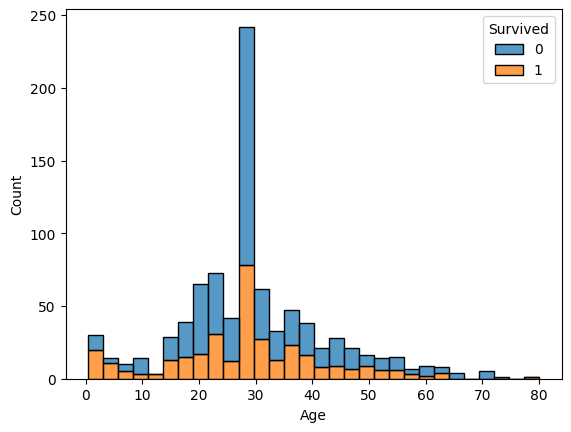

In [ ]:
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack')

<Axes: xlabel='Fare', ylabel='Count'>

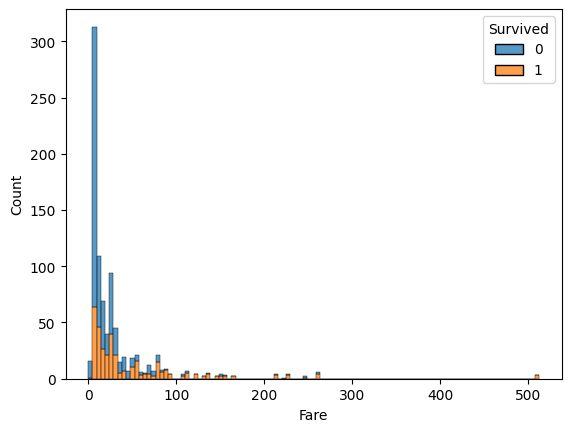

In [ ]:
sns.histplot(x='Fare', hue='Survived', data=df, multiple='stack')

<Axes: xlabel='Sex', ylabel='Survived'>

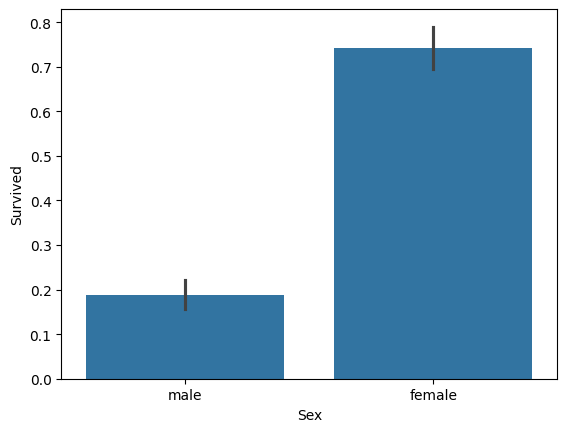

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

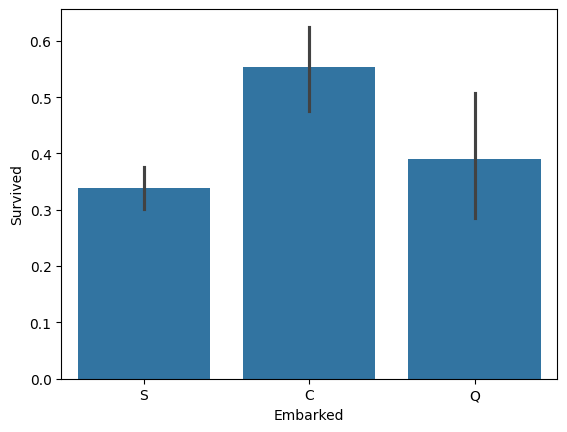

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

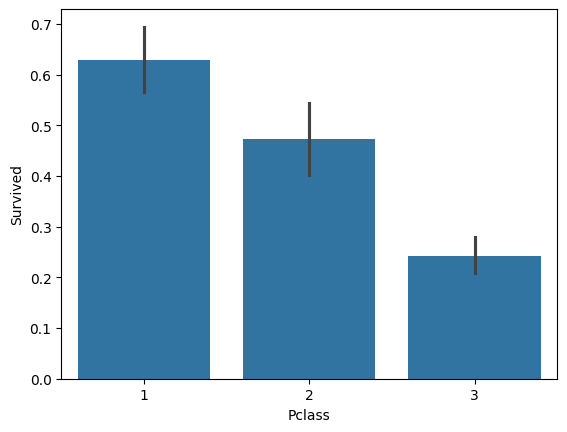

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

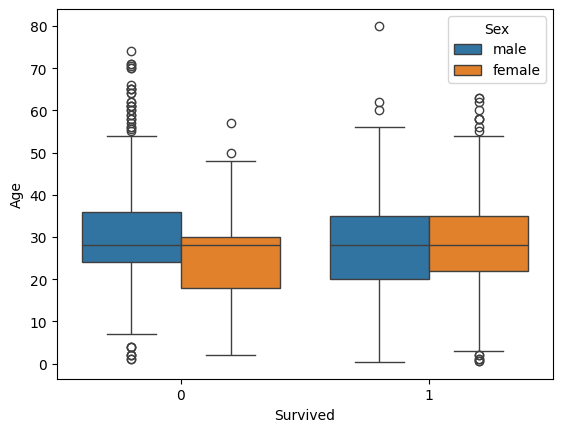

In [ ]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
plt.show()

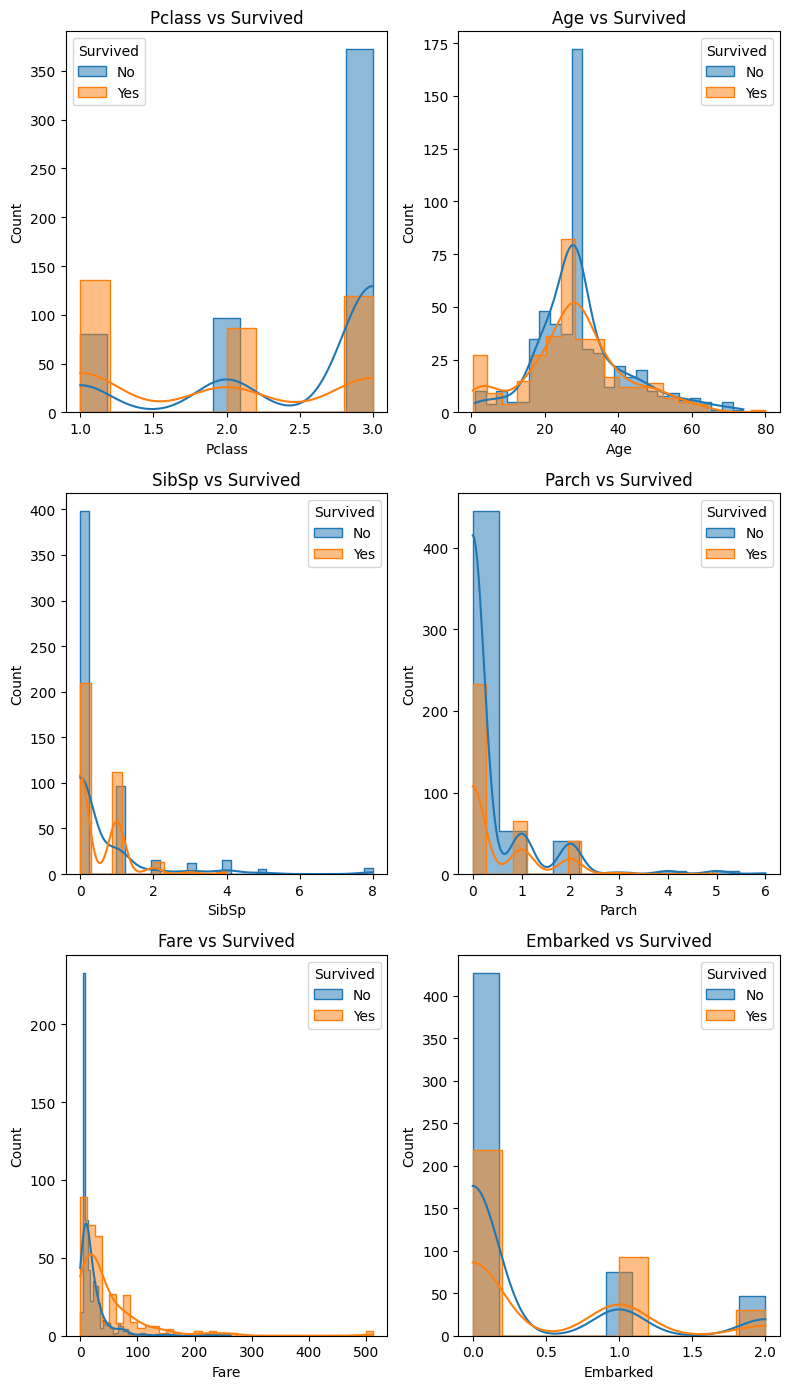

In [ ]:
features = ['Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']

fig, axes = plt.subplots(3, 2, figsize=(8, 14))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for val, label in [(0, 'No'), (1, 'Yes')]:
        subset = df[df['Survived'] == val]
        sns.histplot(data=subset, x=feature, element='step', kde=True, ax=ax, label=label)
    ax.set_title(f'{feature} vs Survived')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Survived')

plt.tight_layout()
plt.show()

# **Feature Correlation Summary**

In [ ]:
corr = df.corr()

<Axes: >

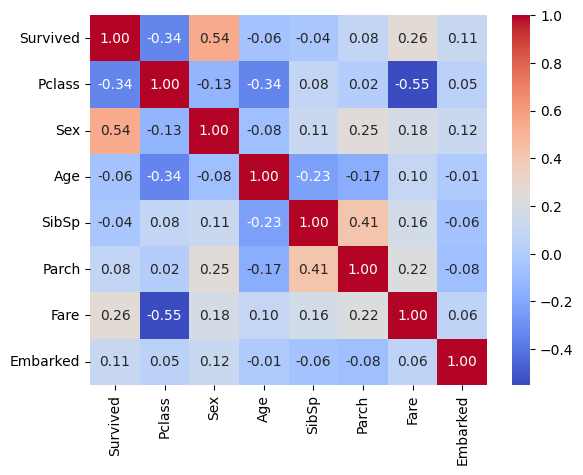

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# **Feature Importance**

In [ ]:
df["Sex"].replace({"male": 0, "female": 1}, inplace=True)
df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace=True)

/tmp/ipython-input-3737239581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({"male": 0, "female": 1}, inplace=True)
/tmp/ipython-input-3737239581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace({"male": 0, "female": 1}, inplace=True)
/tmp/ipython-input-3

In [ ]:
y = df['Survived']
X= df.drop(['Survived'], axis=1)

In [ ]:
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

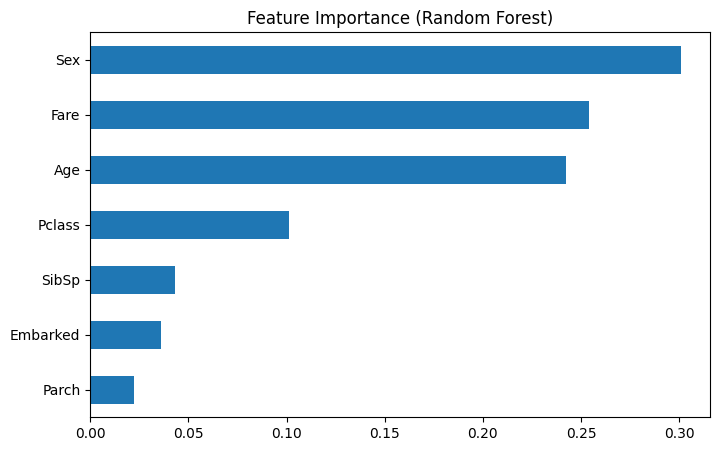

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Model Building & Evaluation**

In [ ]:
y = df['Survived']
X = df.drop(columns=['Survived'])

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=47)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749

Confusion Matrix:
 [[93 16]
 [21 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.75      0.70      0.73        70

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Standardization**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model_S = LogisticRegression(max_iter=1000)
model_S.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_scaled = model_S.predict(x_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[93 16]
 [20 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.76      0.71      0.74        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# **Visualization**

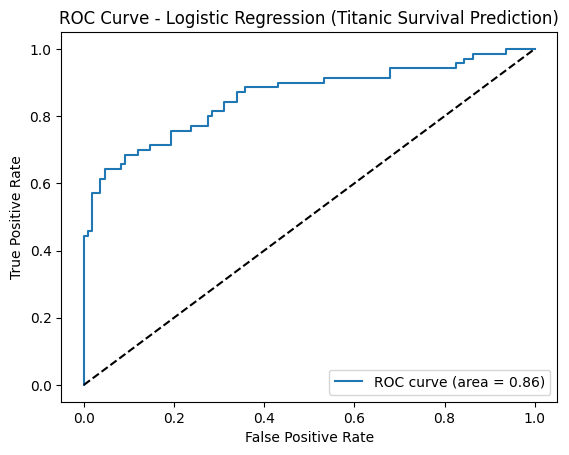

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Titanic Survival Prediction)")
plt.legend(loc="lower right")
plt.show()

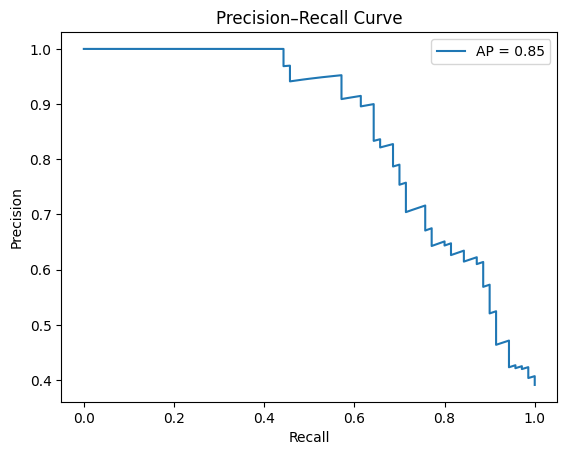

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.show()

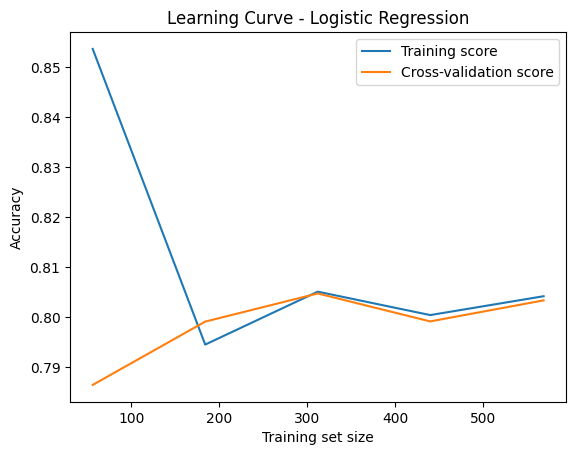

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.show()